# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


critical t_value :  1.7108820799094275
t_value : 3.6519236075802097
p value :  0.0006315972220546454
t_statistics:  3.578139767278185
Null hypothesis rejected.
The increase in sales performance is statistically significant at the 0.05 level.


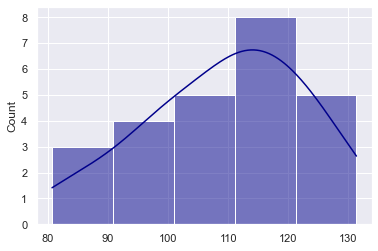

In [1]:

from scipy import stats 
import numpy as np
import seaborn as sns
# Sample data listed above
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])
mu =100
alpha = 0.05
def one_sample_ttest(sample, popmean, alpha):
  
    
    # Population mean
  popmean = mu
 
    # Sample mean (x̄) using NumPy mean()
x_bar= sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
sigma = np.std(sample)

    # Degrees of freedom
df = len(sample) - 1

    # Calculate the critical t-value
t_crit = stats.t.ppf(1 - alpha, df=df)
print("critical t_value : ", t_crit)

    # Calculate the t-value and p-value  
t = (x_bar -  mu)/(sigma/np.sqrt(len(sample)))
print("t_value :" ,t) 
p_value = stats.t.sf(t, df=df)
print("p value : ",p_value)

results = stats.ttest_1samp(a= sample, popmean = mu)    
print("t_statistics: ", results.statistic)   

if results.statistic > t_crit:
    print("Null hypothesis rejected.")
    print("The increase in sales performance is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in sales performance is not statistically significant at the", alpha, "level.")

    
# Visualize sample distribution for normality 
sns.set(color_codes=True)
sns.histplot(sample, kde=True, bins=5, color='darkblue');
   #sns.set(color_codes=True)
   # sns.set(rc={'figure.figsize':(12,10)})
   # sns.histplot(sample, kde=True)
    
    

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [ ]:
# State your hypotheses 


# Ha : there is an increase in grades after program
# Ho : there is no increase in grade 

In [86]:
# The solution that assists in deciding on rejecting or not rejecting the null hypothesis

import numpy as np 
import math
sample_2 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
alpha = 0.05
popmean = 65
results = stats.ttest_1samp(sample_2, popmean)

results



Ttest_1sampResult(statistic=12.687592157174493, pvalue=1.0053355594452825e-10)

In [96]:
t_crit = stats.t.ppf(1 - alpha, df=len(sample_2)-1)
t_crit

1.729132811521367

In [88]:
print(results.statistic)
print(results.pvalue)

12.687592157174493
1.0053355594452825e-10


In [90]:
reject_null_hypothesis = True if results.pvalue < alpha else False
reject_null_hypothesis

True

In [ ]:
# Null hypothesis rejected. Results are statistically significant with t-value = 12.69 critical t-value = 1.729132811521367 and p-value = 1e-10

In [ ]:
# Interpret the results in terms of the p-value

# The p value is less than tha alpha so we can conclude that:
# the training has a SIGNIFICANT effect on the SAT outcome at a significance level of 0.05

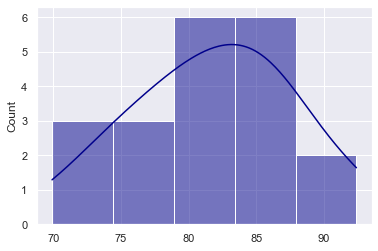

In [91]:
# Visualize sample distribution for normality 
sns.set(color_codes=True)
sns.histplot(sample_2, kde=True, bins=5, color='darkblue');
   #sns.set(color_codes=True)
   # sns.set(rc={'figure.figsize':(12,10)})
   # sns.histplot(sample_2, kde=True)

In [92]:
# With corrected values
sample3 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
)

popmean = 65
alpha = 0.05
results = stats.ttest_1samp(sample3, popmean)

results

Ttest_1sampResult(statistic=13.202088288314906, pvalue=5.083361606682268e-11)

In [97]:
t_crit = stats.t.ppf(1 - alpha, df=len(sample3)-1)
t_crit

1.729132811521367

In [93]:
print(results.statistic)
print(results.pvalue)

13.202088288314906
5.083361606682268e-11


In [94]:
reject_null_hypothesis = True if results.pvalue < alpha else False
reject_null_hypothesis

True

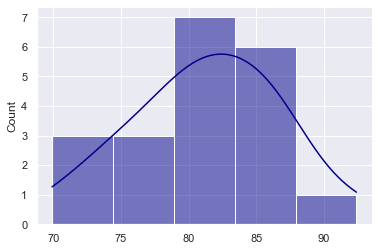

In [95]:
# Visualize sample distribution for normality 
sns.set(color_codes=True)
sns.histplot(sample3, kde=True, bins=5, color='darkblue');
   #sns.set(color_codes=True)
   # sns.set(rc={'figure.figsize':(12,10)})
   # sns.histplot(sample3, kde=True)

In [ ]:
# Null hypothesis rejected. Results are statistically significant with t-value = 13.2 critical t-value = 1.729132811521367 and p-value = 1e-10

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 